1- IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose, STL

2- READ FILES

In [2]:
df = pd.read_csv('PWHEAMTUSDM.csv')

3- RENAME COLUMNS

In [3]:
df.rename(columns = {'DATE':'Date', 'PWHEAMTUSDM':'Price_USD'}, inplace = True)

4- DEFINE NEW COLUMN NAMED YEAR

In [4]:
df['year'] = pd.DatetimeIndex(df['Date']).year

Visualize the data

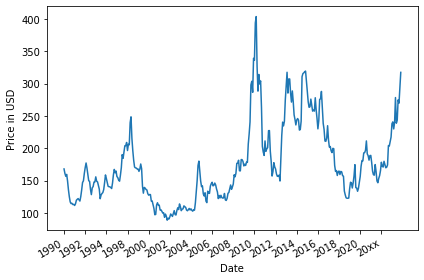

In [5]:
fig, ax = plt.subplots()

ax.plot(df.Date, df.Price_USD)
ax.set_xlabel('Date')
ax.set_ylabel('Price in USD')

# 382 rows / 24 steps = 16 ticks
plt.xticks(np.arange(0, 382, 24), [1990, 1992, 1994, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, '20xx'])

fig.autofmt_xdate()
plt.tight_layout()


In [6]:
advanced_decomposition = STL(df.Price_USD, period=12).fit()

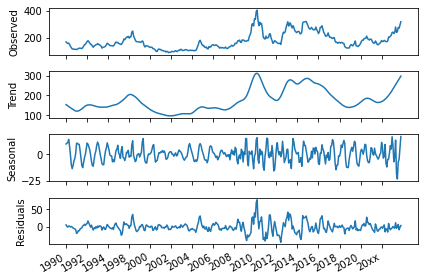

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('Residuals')


plt.xticks(np.arange(0, 382, 24), [1990, 1992, 1994, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, '20xx'])

fig.autofmt_xdate()
plt.tight_layout()

-------------------------------------

In [8]:
pd.options.mode.chained_assignment = None

5- Plot data with train/test split 

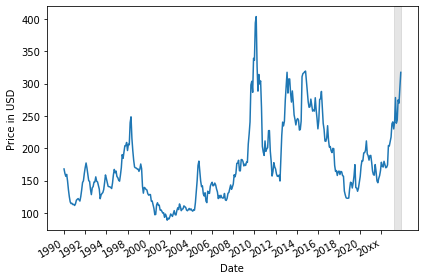

In [9]:
fig, ax = plt.subplots()

ax.plot(df['Date'], df['Price_USD'])
ax.set_xlabel('Date')
ax.set_ylabel('Price in USD')
ax.axvspan(374, 382, color='#808080', alpha=0.2) #Start shading at row 374 & end at 382 (Year 2021)

plt.xticks(np.arange(0, 382, 24), [1990, 1992, 1994, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, '20xx'])

fig.autofmt_xdate()
plt.tight_layout()


6- Split to train/test 

In [10]:
train = df[:-11] #all years
test = df[-11:] #year 2021

7- Baseline Forecasting Methods

7.1 Predict historical mean 

In [11]:
'''Time series forecasting starts with a baseline model that serves as a benchmark for comparison with more complex models.'''

'Time series forecasting starts with a baseline model that serves as a benchmark for comparison with more complex models.'

In [12]:
historical_mean = np.mean(train['Price_USD'])

In [13]:
test.loc[:, 'Predicted_Mean'] = historical_mean

In [14]:
'''The MAPE stands for mean absolute percentage error, 
and it is an intuitive measure of how much a predicted value deviates from the actual value.'''

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [15]:
mape_hist_mean = mape(test['Price_USD'], test['Predicted_Mean'])

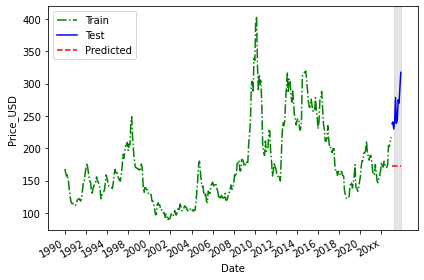

In [16]:
fig, ax = plt.subplots()

ax.plot(train['Date'], train['Price_USD'], 'g-.', label='Train')
ax.plot(test['Date'], test['Price_USD'], 'b-', label='Test')
ax.plot(test['Date'], test['Predicted_Mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Price_USD')

ax.axvspan(374, 382, color='#808080', alpha=0.2) #Start shading at row 374 & end at 382 (Year 2021)
ax.legend(loc=2)
plt.xticks(np.arange(0, 382, 24), [1990, 1992, 1994, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, '20xx'])

fig.autofmt_xdate()
plt.tight_layout()

7.2 Predict last year mean 

In [17]:
last_year_mean = np.mean(train['Price_USD'][-11:])

In [18]:
test.loc[:, 'Predicted__last_yr_Mean'] = last_year_mean

test

,Date,Price_USD,year,Predicted_Mean,Predicted__last_yr_Mean
372,2021-01-01,237.944250,2021,172.003694,186.174215
373,2021-02-01,240.806388,2021,172.003694,186.174215
374,2021-03-01,229.887549,2021,172.003694,186.174215
375,2021-04-01,239.936143,2021,172.003694,186.174215
376,2021-05-01,278.447005,2021,172.003694,186.174215
377,2021-06-01,238.767027,2021,172.003694,186.174215
378,2021-07-01,243.628007,2021,172.003694,186.174215
379,2021-08-01,274.876030,2021,172.003694,186.174215
380,2021-09-01,269.733507,2021,172.003694,186.174215
381,2021-10-01,294.036818,2021,172.003694,186.174215


In [19]:
mape_last_year_mean = mape(test['Price_USD'], test['Predicted__last_yr_Mean'])
mape_last_year_mean

27.808772411152255

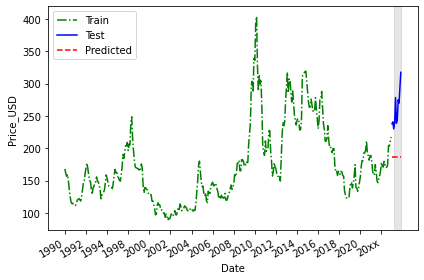

In [20]:
fig, ax = plt.subplots()

ax.plot(train['Date'], train['Price_USD'], 'g-.', label='Train')
ax.plot(test['Date'], test['Price_USD'], 'b-', label='Test')
ax.plot(test['Date'], test['Predicted__last_yr_Mean'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Price_USD')

ax.axvspan(374, 382, color='#808080', alpha=0.2) #Start shading at row 374 & end at 382 (Year 2021)
ax.legend(loc=2)

plt.xticks(np.arange(0, 382, 24), [1990, 1992, 1994, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, '20xx'])

fig.autofmt_xdate()
plt.tight_layout()

7.3 Predict last know value 

In [21]:
last = train['Price_USD'].iloc[-1]

In [22]:
test.loc[:, 'pred_last'] = last

In [23]:
mape_last = mape(test['Price_USD'], test['pred_last'])
mape_last

15.73452208103977

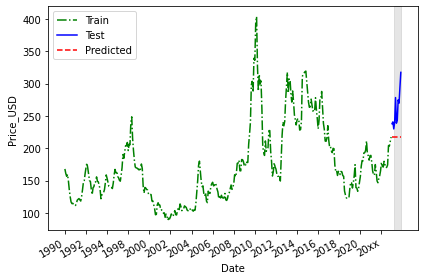

In [24]:
fig, ax = plt.subplots()

ax.plot(train['Date'], train['Price_USD'], 'g-.', label='Train')
ax.plot(test['Date'], test['Price_USD'], 'b-', label='Test')
ax.plot(test['Date'], test['pred_last'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Price_USD')

ax.axvspan(374, 382, color='#808080', alpha=0.2) #Start shading at row 374 & end at 382 (Year 2021)
ax.legend(loc=2)

plt.xticks(np.arange(0, 382, 24), [1990, 1992, 1994, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, '20xx'])

fig.autofmt_xdate()
plt.tight_layout()

7.4 Naive Seasonal Forecast

In [25]:
# The naïve seasonal forecast takes the last observed cycle and repeats it into the future.
# A full cycle occurs every 12 months.

'''We implement this baseline by simply taking the last twelve values of the train set, which correspond to each month of 2020, 
and assigning them to the corresponding month in 2021.'''

test.loc[:, 'pred_last_season'] = train['Price_USD'][-11:].values

test

,Date,Price_USD,year,Predicted_Mean,Predicted__last_yr_Mean,pred_last,pred_last_season
372,2021-01-01,237.944250,2021,172.003694,186.174215,217.312543,172.231103
373,2021-02-01,240.806388,2021,172.003694,186.174215,217.312543,170.874752
374,2021-03-01,229.887549,2021,172.003694,186.174215,217.312543,179.746518
375,2021-04-01,239.936143,2021,172.003694,186.174215,217.312543,174.954969
376,2021-05-01,278.447005,2021,172.003694,186.174215,217.312543,169.722337
377,2021-06-01,238.767027,2021,172.003694,186.174215,217.312543,170.574122
378,2021-07-01,243.628007,2021,172.003694,186.174215,217.312543,174.182477
379,2021-08-01,274.876030,2021,172.003694,186.174215,217.312543,204.137314
380,2021-09-01,269.733507,2021,172.003694,186.174215,217.312543,203.426300
381,2021-10-01,294.036818,2021,172.003694,186.174215,217.312543,210.753936


In [26]:
mape_naive_seasonal = mape(test['Price_USD'], test['pred_last_season'])
mape_naive_seasonal

28.34965946870746

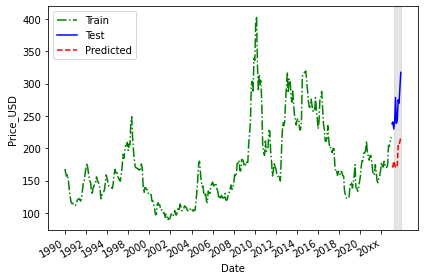

In [27]:
fig, ax = plt.subplots()

ax.plot(train['Date'], train['Price_USD'], 'g-.', label='Train')
ax.plot(test['Date'], test['Price_USD'], 'b-', label='Test')
ax.plot(test['Date'], test['pred_last_season'], 'r--', label='Predicted')
ax.set_xlabel('Date')
ax.set_ylabel('Price_USD')

ax.axvspan(374, 382, color='#808080', alpha=0.2) #Start shading at row 374 & end at 382 (Year 2021)
ax.legend(loc=2)

plt.xticks(np.arange(0, 382, 24), [1990, 1992, 1994, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020, '20xx'])

fig.autofmt_xdate()
plt.tight_layout()


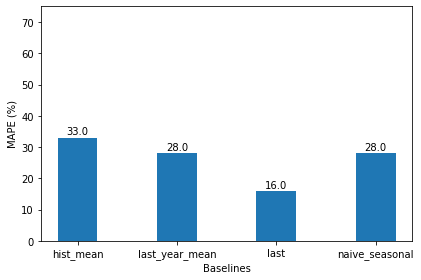

In [28]:
fig, ax = plt.subplots()

x = ['hist_mean', 'last_year_mean', 'last', 'naive_seasonal']
y = [mape_hist_mean.round(), mape_last_year_mean.round(), mape_last.round(), mape_naive_seasonal.round()]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Baselines')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 75)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(value), ha='center')

plt.tight_layout()

-----------------------------------